In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from seaborn import regplot
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv('data/Salary_Data.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Teza: Czy wielkość wypłaty zależy od doświadczenia na stanowisku? 

In [3]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Bardzo mocna korelacja.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

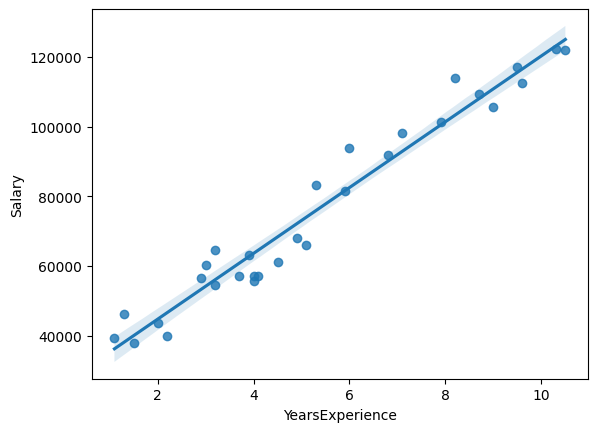

In [4]:
regplot(data=df, x='YearsExperience', y='Salary')

In [5]:
X = df[['YearsExperience']]
y = df[['Salary']]

print(X.shape)
print(y.shape)

(30, 1)
(30, 1)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.head(7))
print(X_train.shape)

    YearsExperience
28             10.3
24              8.7
12              4.0
0               1.1
4               2.2
16              5.1
5               2.9
(24, 1)


In [28]:
print(X_test.head(7))
print(X_test.shape)

    YearsExperience
27              9.6
15              4.9
23              8.2
17              5.3
8               3.2
9               3.7
(6, 1)


In [23]:
print(y_train.head(7))
print(y_train.shape)

      Salary
28  122391.0
24  109431.0
12   56957.0
0    39343.0
4    39891.0
16   66029.0
5    56642.0
(24, 1)


In [24]:
print(y_test.head(7))
print(y_test.shape)

      Salary
27  112635.0
15   67938.0
23  113812.0
17   83088.0
8    64445.0
9    57189.0
(6, 1)


In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
preds = model.predict(X_test)

In [33]:
X_test_with_preds = X_test.copy()
X_test_with_preds['actual salary'] = y_test.values
X_test_with_preds['preds'] = preds

In [34]:
X_test_with_preds.head(5)

,YearsExperience,actual salary,preds
27,9.6,112635.0,115790.210113
15,4.9,67938.0,71498.278095
23,8.2,113812.0,102596.868661
17,5.3,83088.0,75267.804224
8,3.2,64445.0,55477.792045


In [53]:
rms = np.sqrt(mean_squared_error(y_test, preds))
rms

7059.04362190151

Model myli się średnio o 7059.04 jednostek wypłaty.

In [54]:
print(y_test.min(), y_test.max())

Salary    57189.0
dtype: float64 Salary    113812.0
dtype: float64


Czy przy tak wysokiej minimalnej wypłacie jest to błąd akceptowalny?